In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

df = {
    "cooking": pd.read_csv('../dataset/processed/cooking.csv'),
    "crypto": pd.read_csv('../dataset/processed/crypto.csv'),
    "robotics": pd.read_csv('../dataset/processed/robotics.csv'),
    "biology": pd.read_csv('../dataset/processed/biology.csv'),
    "travel": pd.read_csv('../dataset/processed/travel.csv'),
    "diy": pd.read_csv('../dataset/processed/diy.csv'),
    #"physics": pd.read_csv('physics.csv'),
}

from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import math
import sys
import random
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe verdadeira')
    plt.xlabel('Classe prevista')

In [2]:
data = []
for file in df:
    for i in range(df[file].shape[0]):
        if type(df[file].iloc[i]['title']) is str:
            data.append(df[file].iloc[i]['title'])
        if type(df[file].iloc[i]['content']) is str:
            data.append(df[file].iloc[i]['content'])

In [3]:
X = []
y = []
for file in df:
    for i in range(2000):
        if type(df[file].iloc[i]['content']) is str:
            X.append(df[file].iloc[i]['content'])
            y.append(file)
            
X_test = []
y_test = []
for file in df:
    for i in range(2001,2501):#range(df[file].shape[0]):
        if type(df[file].iloc[i]['content']) is str:
            X_test.append(df[file].iloc[i]['content'])
            y_test.append(file)
            

Vocabulary size: 832


C:\Users\marce\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion matrix, without normalization
[[435   0   4   5   3  53]
 [  1 436  20   5   1  37]
 [  3   9 376  13  13  86]
 [ 15   5  38 307  12 123]
 [  6   2  15   8 413  56]
 [ 15   1  30   9  17 428]]


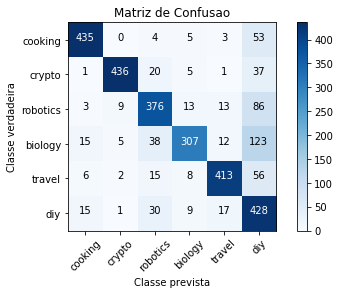

Accuracy: 0.7983333333333333


In [4]:
sv = CountVectorizer(binary=True, max_df=0.025, min_df=0.005)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

xg = XGBClassifier()
xg.fit(X_.toarray(), y)
result = xg.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))

Vocabulary size: 488


C:\Users\marce\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion matrix, without normalization
[[387   3  26  60   6  18]
 [  2 414  36  45   1   2]
 [ 23  14 336  95  15  17]
 [ 24   6  67 375   8  20]
 [  6   2  30  77 370  15]
 [ 29   3  38  46   8 376]]


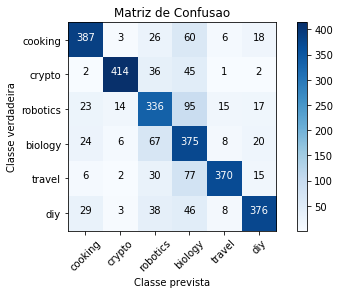

Accuracy: 0.7526666666666667


In [5]:
sv = CountVectorizer(binary=True, max_df=0.4, min_df=0.01)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

xg = XGBClassifier()
xg.fit(X_.toarray(), y)
result = xg.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))

Vocabulary size: 980


C:\Users\marce\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion matrix, without normalization
[[441   3   4  26   4  22]
 [  4 435  22  34   1   4]
 [ 18   9 382  66   7  18]
 [ 30   6  34 397   7  26]
 [ 13   1   9  39 422  16]
 [ 20   4  24  26  12 414]]


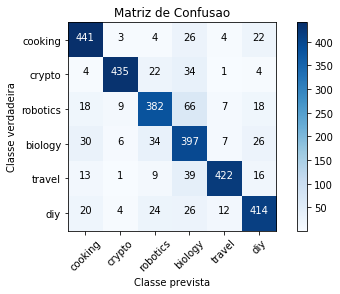

Accuracy: 0.8303333333333334


In [7]:
sv = CountVectorizer(binary=True, max_df=0.9, min_df=0.005)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

xg = XGBClassifier()
xg.fit(X_.toarray(), y)
result = xg.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))

Vocabulary size: 7277


C:\Users\marce\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion matrix, without normalization
[[451   3   2  23   3  18]
 [  9 443   4  36   3   5]
 [ 13   8 414  38   8  19]
 [ 23   3  11 434   7  22]
 [ 15   1   1  40 428  15]
 [ 20   3  11  27  11 428]]


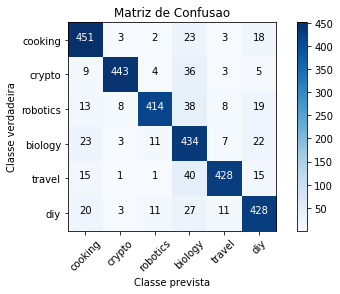

Accuracy: 0.866


In [8]:
sv = CountVectorizer(binary=True, max_df=0.3, min_df=50)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

xg = XGBClassifier()
xg.fit(X_.toarray(), y)
result = xg.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))

Vocabulary size: 9541


C:\Users\marce\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion matrix, without normalization
[[451   3   2  24   3  17]
 [  9 441   4  38   2   6]
 [ 10   8 415  40   8  19]
 [ 23   3  12 435   6  21]
 [ 16   1   1  37 430  15]
 [ 19   3  11  27  11 429]]


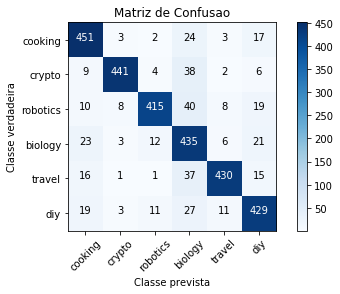

Accuracy: 0.867


In [9]:
sv = CountVectorizer(binary=True, max_df=0.4, min_df=30)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

xg = XGBClassifier()
xg.fit(X_.toarray(), y)
result = xg.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))